<a href="https://colab.research.google.com/github/satoshi-yamakawa/exp4_3/blob/data-loading/exp4_reidai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

データ読み込みをするにはデータファイルを事前にアップロードしておく必要がある

In [105]:
######################
# data1.xlsxの読み込み
######################
import numpy as np
import math
import matplotlib.pyplot as plt
import xlrd
Npre = 16 # プリアンブルシンボル数
Ndata = 32  # データシンボル数

wb = xlrd.open_workbook('data1.xlsx')               # エクセルの読み込み

p = wb.sheet_by_name('プリアンブルビット系列')      # 数値を読み込みたいシートを選択
m_pre = np.array(p.col_values(0))                   # プリアンブルビット系列を読み込み
d = wb.sheet_by_name('データ系列')
m_data = np.array(d.col_values(0))                  # データ系列を読み込み

sheet = wb.sheet_by_name('変調信号')
col1 = np.array(sheet.col_values(0))
col1 = np.delete(col1,0,0)
col1 = np.array([float(s) for s in col1])           # u_Iデータを読み込み
col2 = np.array(sheet.col_values(1))
col2 = np.delete(col2,0,0)
col2 = np.array([float(s) for s in col2])           # u_Qデータを読み込み

u1 = col1+1j*col2                                   # 変調信号

u_hat_pre = np.delete(u1,range(Npre,Npre+Ndata),0)  # 受信プリアンブル信号
u_hat_data = np.delete(u1,range(Npre),0)            # 受信データビット信号

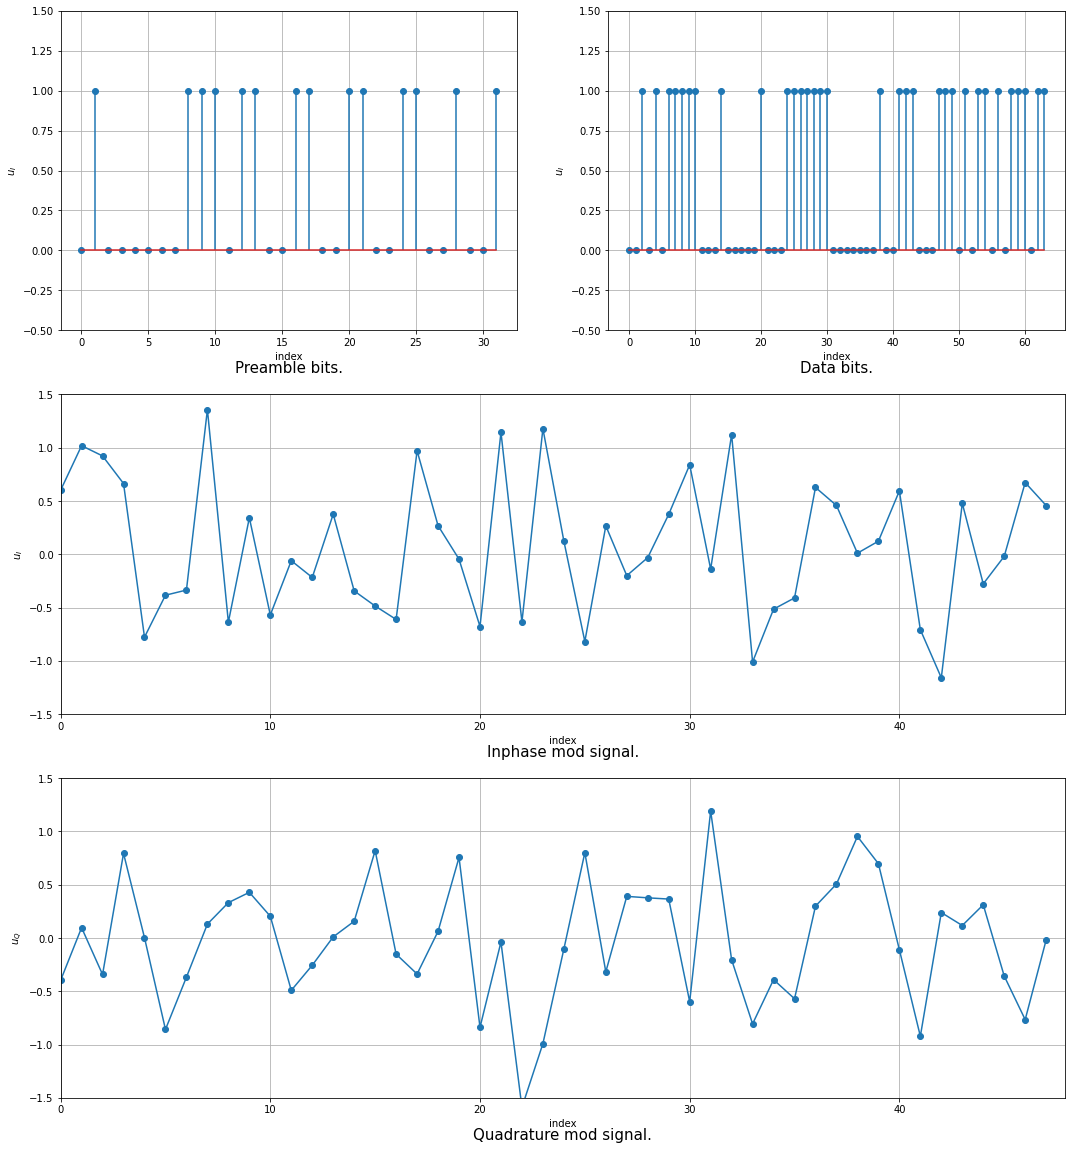

In [110]:
R  = 100;                 # シンボルレート [symbols/sec]
T  = 1/R;                 # シンボル周期
Fs = R*10;                # サンプリング周波数（シンボル周期の10倍）
Ts = 1/Fs;                # サンプル周期
N  = round(T/Ts);         # シンボル当たりのサンプル数

M = Npre+Ndata       # シンボル数（QPSK：2ビット/シンボル)

mm = np.arange(M);
n  = np.arange(M*N); 
n_pre = np.arange(Npre*2);    # プリアンブルビット数
n_data = np.arange(Ndata*2);  # データビット数

fig = plt.figure(figsize=(18,20))

ax1 = fig.add_subplot(321)
ax1.stem(n_pre, m_pre,use_line_collection=True);
ax1.set_xlabel("index")
ax1.set_ylabel("$u_I$")
ax1.set_ylim(-0.5,1.5)
ax1.grid("both")
plt.title("Preamble bits.",y=-0.15,fontsize = 15);

ax2 = fig.add_subplot(322)
ax2.stem(n_data, m_data,use_line_collection=True)
ax2.set_xlabel("index");
ax2.set_ylabel("$u_I$")
ax2.set_ylim(-0.5,1.5)
ax2.grid("both")
plt.title("Data bits.",y=-0.15,fontsize = 15);

ax3 = fig.add_subplot(312)
ax3.plot(mm, col1, '-o')
ax3.set_xlabel("index")
ax3.set_ylabel("$u_I$")
ax3.set_xlim(0,t[-1]/T)
ax3.set_ylim(-1.5,1.5)
ax3.grid("both")
plt.title("Inphase mod signal.",y=-0.15,fontsize = 15);

ax4 = fig.add_subplot(313)
ax4.plot(mm, col2, '-o')
ax4.set_xlabel("index")
ax4.set_ylabel("$u_Q$")
ax4.set_xlim(0,t[-1]/T)
ax4.set_ylim(-1.5,1.5)
ax4.grid("both")
plt.title("Quadrature mod signal.",y=-0.15,fontsize = 15);

In [107]:
######################
# data2.xlsxの読み込み
######################
import xlrd
Npre = 16
Ndata = 32

wb = xlrd.open_workbook('data2.xlsx')

p = wb.sheet_by_name('プリアンブルビット系列')
pcol1 = np.array(p.col_values(0))                   # プリアンブルビット系列を読み込み
d = wb.sheet_by_name('データ系列')
dcol1 = np.array(d.col_values(0))                   # データ系列を読み込み

for ii in range(4):                                 # 4つの変調信号をfor文を使って読み込み
  if ii == 0:
    sheet = wb.sheet_by_name('変調信号(Ant１，TS１）')
  if ii == 1:
    sheet = wb.sheet_by_name('変調信号(Ant１，TS２）')
  if ii == 2:
    sheet = wb.sheet_by_name('変調信号(Ant２，TS１）')
  if ii == 3:
    sheet = wb.sheet_by_name('変調信号(Ant２，TS２）')

  col1 = np.array(sheet.col_values(0))
  col1 = np.delete(col1,0,0)
  col1 = np.array([float(s) for s in col1])
  col2 = np.array(sheet.col_values(1))
  col2 = np.delete(col2,0,0)
  col2 = np.array([float(s) for s in col2])

  if ii == 0:
    u1 = col1+1j*col2 # 変調信号1
    u1_pre = np.delete(u1,range(Npre,Npre+Ndata),0)
    u1_data = np.delete(u1,range(Npre),0)
  if ii == 1:
    u2 = col1+1j*col2 # 変調信号2
    u2_pre = np.delete(u2,range(Npre,Npre+Ndata),0)
    u2_data = np.delete(u2,range(Npre),0)
  if ii == 2:
    u3 = col1+1j*col2 # 変調信号3
    u3_pre = np.delete(u3,range(Npre,Npre+Ndata),0)
    u3_data = np.delete(u3,range(Npre),0)
  if ii == 3:
    u4 = col1+1j*col2 # 変調信号4
    u4_pre = np.delete(u4,range(Npre,Npre+Ndata),0)
    u4_data = np.delete(u4,range(Npre),0)

u_ant1_pre = u1_pre + u2_pre                        # アンテナ1のプリアンブル合成系列信号
u_ant1_data = u1_data + u2_data                     # アンテナ1のデータ系列合成信号

u_ant2_pre = u3_pre + u4_pre                        # アンテナ2のプリアンブル系列合成信号
u_ant2_data = u3_data + u4_data                     # アンテナ2のデータ系列合成信号

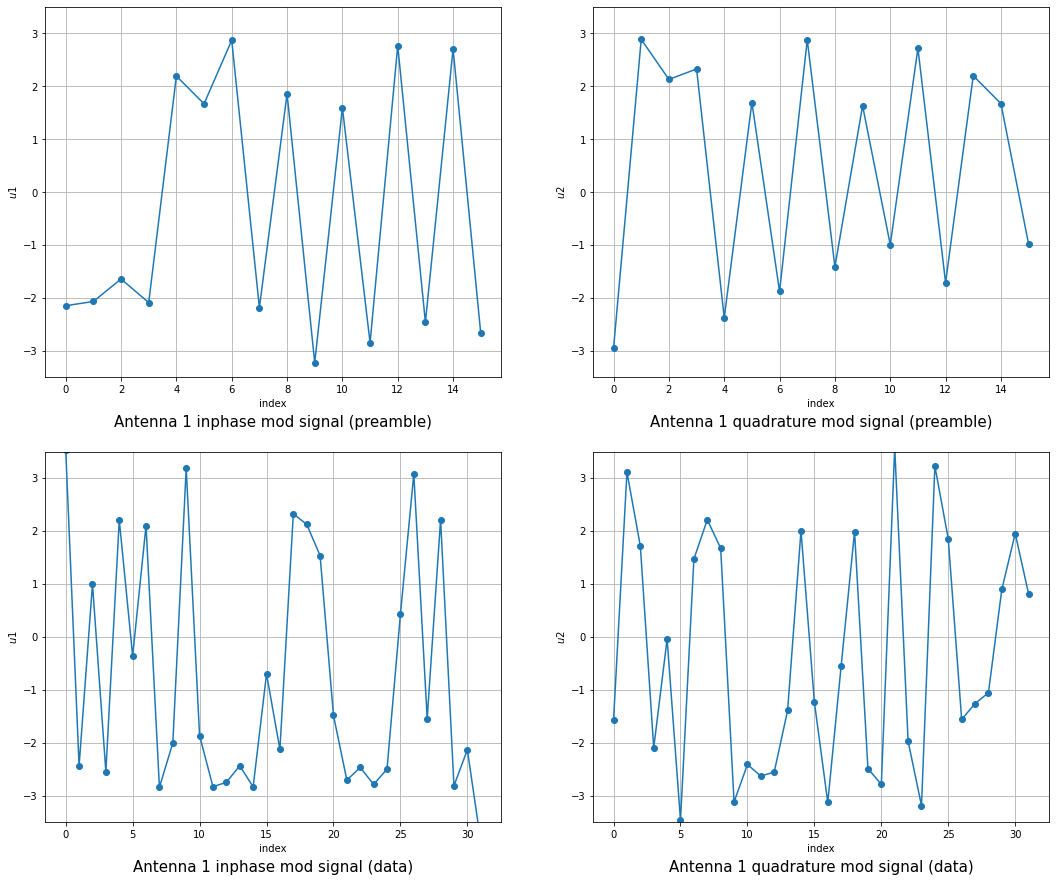

In [108]:
N_pre = np.arange(Npre);
N_data = np.arange(Ndata);
fig = plt.figure(figsize=(18,15));
ax1 = fig.add_subplot(221);
ax1.plot(N_pre, u_ant1_pre.real, '-o');
ax1.set_xlabel("index")
ax1.set_ylabel("$u1$")
ax1.set_ylim(-3.5,3.5)
ax1.grid("both")
plt.title("Antenna 1 inphase mod signal (preamble).",y=-0.15,fontsize = 15);

ax2 = fig.add_subplot(222);
ax2.plot(N_pre, u_ant1_pre.imag, '-o')
ax2.set_xlabel("index")
ax2.set_ylabel("$u2$")
ax2.set_ylim(-3.5,3.5)
ax2.grid("both")
plt.title("Antenna 1 quadrature mod signal (preamble).",y=-0.15,fontsize = 15);

ax3 = fig.add_subplot(223);
ax3.plot(N_data, u_ant1_data.real, '-o');
ax3.set_xlabel("index")
ax3.set_ylabel("$u1$")
ax3.set_ylim(-3.5,3.5)
ax3.grid("both")
plt.title("Antenna 1 inphase mod signal (data).",y=-0.15,fontsize = 15);

ax4 = fig.add_subplot(224);
ax4.plot(N_data, u_ant1_data.imag, '-o');
ax4.set_xlabel("index");
ax4.set_ylabel("$u2$");
ax4.set_ylim(-3.5,3.5);
ax4.grid("both");
plt.title("Antenna 1 quadrature mod signal (data).",y=-0.15,fontsize = 15);